In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv('../../decision_trees/CreditScoring.csv')

df.columns = df.columns.str.lower()

In [17]:
df.head(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [23]:
df.nunique()

status          3
seniority      47
home            7
time           11
age            50
marital         6
records         2
job             5
expenses       94
income        352
assets        159
debt          182
amount        285
price        1419
dtype: int64

In [18]:
# let's convert categorical with numerical value
# to string (object in pandas)
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

In [19]:
df.status = df.status.map(status_values)
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)

In [20]:
df.describe().round()
# strange big values in 'income'/'assets'/'debt'

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [21]:
for col in ['income', 'assets', 'debt']:
    df[col] = df[col].replace(to_replace=99999999, value=0)

In [22]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,130.0,5346.0,342.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,87.0,11525.0,1244.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,119.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,164.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [24]:
df = df[df.status != 'unk'].reset_index(drop=True)
# as we don't want unkown status in our dataframe

In [28]:
# And check whether we remove them
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [29]:
# default variable creation
df['default'] = (df.status == 'default').astype(int)

In [30]:
# remove target variable from dataset
del df['status']

# Preparation

In [31]:
df.nunique()

seniority      47
home            7
time           11
age            50
marital         6
records         2
job             5
expenses       94
income        352
assets        159
debt          182
amount        285
price        1419
default         2
dtype: int64

In [32]:
df.dtypes

seniority     int64
home         object
time          int64
age           int64
marital      object
records      object
job          object
expenses      int64
income        int64
assets        int64
debt          int64
amount        int64
price         int64
default       int64
dtype: object

In [48]:
# numerical
numerical = list(df.dtypes[df.dtypes != 'object'].index)
numerical

['seniority',
 'time',
 'age',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price',
 'default']

In [49]:
# categorical
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical

['home', 'marital', 'records', 'job']

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(full_train, test_size=0.25, random_state=1)

In [72]:
y_full_train = full_train.default.values
y_test = df_test.default.values
y_train = df_train.default.values
y_valid = df_valid.default.values

In [73]:
del full_train['default']
del df_test['default']
del df_valid['default']
del df_train['default']

# Q1

In [40]:
from sklearn.metrics import roc_auc_score

In [53]:
def calc_feature_importance(curr_df, features):
    result = {}
    
    for f in features:
        if f == 'default':
            continue
        
        metric = roc_auc_score(curr_df['default'], curr_df[f])
        if metric < 0.5:
            metric = roc_auc_score(curr_df['default'], -curr_df[f])
        
        result[f] = metric
    
    return result

In [54]:
calc_feature_importance(df_train, numerical)

{'seniority': 0.7093778624491943,
 'time': 0.5608662489595051,
 'age': 0.5732933272499939,
 'expenses': 0.5009184217217011,
 'income': 0.682006666132633,
 'assets': 0.6486042567122802,
 'debt': 0.5047829675783548,
 'amount': 0.5910773431595518,
 'price': 0.5043329862114843}

In [62]:
df[['seniority', 'default']].corr()

,seniority,default
seniority,1.000000,-0.260393
default,-0.260393,1.000000


In [63]:
features = ['seniority', 'income', 'assets', 'records', 'job', 'home']

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [69]:
dv = DictVectorizer(sparse=False)

In [70]:
dict_train = df_train[features].to_dict(orient='records')
X_train = dv.fit_transform(dict_train)

In [71]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [74]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

# Q2

In [75]:
dict_valid = df_valid.to_dict(orient='records')
X_valid = dv.transform(dict_valid)

In [76]:
soft_predictions = model.predict_proba(X_valid)[:, 1]

In [77]:
thresholds = np.linspace(0, 1, 21)

In [79]:
results = []

for t in thresholds:
    default_result = (soft_predictions >= t)
    result = (default_result == y_valid).mean()
    results.append(result)

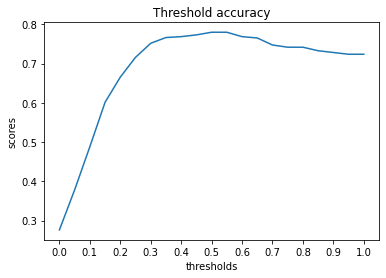

In [81]:
plt.plot(thresholds, results)
plt.title('Threshold accuracy')
plt.xlabel('thresholds')
plt.ylabel('scores')
plt.xticks(np.linspace(0, 1, 11))

plt.show()

In [82]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy_score(y_valid, soft_predictions >= 0.5)

0.7800224466891134